## Build a machine learning model to classify emails as Spam or Not Spam using Natural Language Processing (NLP) techniques.

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("C:/Users/vedan/OneDrive/Documents/cogenetix/Task 5/spam.csv", encoding="latin-1")
df = pd.DataFrame(data)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Text Cleaning
# Import NLP tools

import nltk
import re
import string
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)              # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [11]:
# Apply cleaning
df['clean_message'] = df['message'].apply(clean_text)
df.head()

,label,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

y = df['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
# Train Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Model Evaluation
# 🔹 Predictions
y_pred = model.predict(X_test)

In [17]:
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("Accuracy   :",accuracy)
print("Precision  :",precision)
print("Recall     :",recall)
print("F1_score   :",f1)

Accuracy   : 0.967713004484305
Precision  : 1.0
Recall     : 0.76
F1_score   : 0.8636363636363636


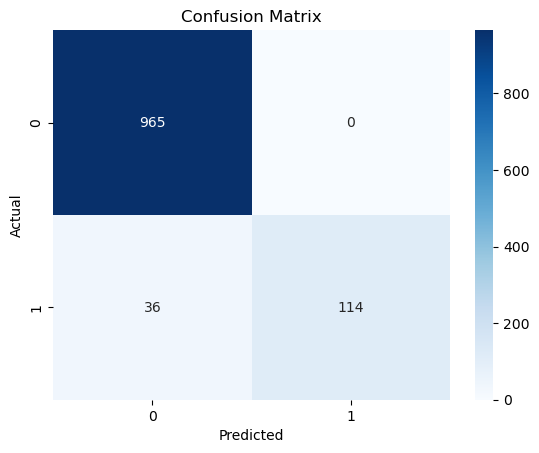

In [19]:
# Confusion Matrix & Report
# 🔹 Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
# Predict New / Unseen Email



def predict_email(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    return "Spam" if prediction[0] == 1 else "Not Spam"

In [22]:
#Test Example 
predict_email("Congratulations! You won a free iPhone. Click now!")

'Spam'

In [24]:
predict_email("Hi, can we meet tomorrow for the project discussion?")

'Not Spam'

An email spam classification system was developed using NLP techniques.
Text preprocessing included stopword removal, punctuation cleaning, and normalization.
TF-IDF was used for feature extraction, and a Multinomial Naive Bayes classifier was trained.
The model achieved high accuracy and was evaluated using precision, recall, F1-score, confusion matrix, and classification report.